```bash
Dow Jones Multiple Linear Regression
```

In [18]:
# Libraries
import pandas as pd # loading in, all dataframe work
import matplotlib.pyplot as plt # all plots
import statsmodels.api as sm # OLS
from sklearn.model_selection import train_test_split # train test split
from sklearn.metrics import mean_squared_error # mse, rmse calculation
import seaborn as sns # correlation matrix plot

In [13]:
# Load in the data
data = pd.read_csv('merged_data.csv')
data.rename(columns={'CPALWE01USQ661N': 'CPI', 'S&P 500 ^GSPC': 'S&P_500', 'NASDAQ ^IXIC': 'NASDAQ', 'Dow Jones ^DJI':'Dow_Jones', 'RealInterestRate':'Real_IR', 'UnemploymentRate': 'Unemployment_Rate', 'FedFundsRate': 'Federal_Funds_Rate'}, inplace = True)
data.head(10)

,Date,S&P_500,NASDAQ,Dow_Jones,CPI,Real_IR,Unemployment_Rate,GDP_Growth,M2_Supply,Federal_Funds_Rate
0,1992-01-01,408.779999,620.210022,3223.399902,58.870052,3.198542,7.3,4.9,3398.6,4.03
1,1992-04-01,414.950012,578.679993,3359.100098,59.387717,3.789860,7.4,4.4,3434.1,3.73
2,1992-07-01,424.209991,580.830017,3393.800049,59.862244,3.353099,7.7,4.0,3407.1,3.25
3,1992-10-01,418.679993,605.169983,3226.300049,60.279252,2.728044,7.3,4.2,3413.8,3.10
4,1993-01-01,438.779999,696.340027,3310.000000,60.696260,3.267908,7.3,0.7,3455.2,3.02
5,1993-04-01,440.190002,661.419983,3427.550049,61.185166,2.774517,7.1,2.3,3438.6,2.96
6,1993-07-01,448.130005,704.700012,3539.469971,61.415239,2.591799,6.9,1.9,3450.7,3.06
7,1993-10-01,467.829987,779.260010,3680.590088,61.832248,2.398843,6.8,5.6,3449.1,2.99
8,1994-01-01,481.609985,800.469971,3978.360107,62.119840,2.772685,6.6,3.9,3502.8,3.05
9,1994-04-01,450.910004,733.840027,3681.689941,62.551227,3.659183,6.4,5.5,3507.2,3.56


In [15]:
# Identifying dependent and independent variables
independent_variables = ['CPI', 'Real_IR', 'Unemployment_Rate', 'GDP_Growth', 'M2_Supply', 'Federal_Funds_Rate']
dependent_variable = ['Dow_Jones']

x = data[independent_variables]
x_constant = sm.add_constant(x) # Adding a constant value of x
y = data[dependent_variable]

In [16]:
# Due to time-series nature, NO SHUFFLE (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_constant, y, test_size = .20, shuffle = False)

# Running OLS
model = sm.OLS(y_train, x_train).fit()

# printing summary results
print("==============================================================================")
print("                Full Model Train Multiple Linear Regression"                   )
print("==============================================================================")
print(model.summary())

                Full Model Train Multiple Linear Regression
                            OLS Regression Results                            
Dep. Variable:              Dow_Jones   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     358.3
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           6.37e-63
Time:                        19:35:49   Log-Likelihood:                -835.55
No. Observations:                 102   AIC:                             1685.
Df Residuals:                      95   BIC:                             1703.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

```bash
The R-Sqaured of this MLR on the train set is .958, which means that 95.8% of the variation of Dow Jones can be explained by CPI, Real Interest Rate, Unemployment Rate, GDP Growth, M2 Supply, and Federal Funds Rate. However, a caviat of MLR is colinearity.

CPI (coefficient = 198.233): A one unit increase in CPI, an independent variable results in a 198.233 point increase in Dow Jones. This is statistically significant (.000 < 0.05). 

Real Interest Rate (coefficient = -37.399): A one unit increase in the real interest rate, an independent variable results in a 37.390 point decrease in Dow Jones. This variable is not statistically significant (.882 > 0.05). 

Unemployment Rate (coefficient = -966.596): A one unit increase in the unemploment rate, an independent variale results in a 966.596 decrease in Dow Jones. This variable is statistically significiant (.000 < 0.05).

GDP Growth (coefficient = 161.259): A one unit increase in gdp growth, an independent variable results in a 161.259 increase in Dow Jones. This variable is statistically significant (.000 < 0.05).

M2 Supply (coefficient =  0.5610): A one unit increase in M2 money supply, an independent variable results in a 0.5610 increase in Dow Jones. This variable is statistically significiant (0.00 < 0.05). 

Federal Funds Rate (coefficient = 34.937): A one unit increase in federal funds rate results in a 34.937 increase in Dow Jones. This variable is not statistically significant (.753 > 0.05). 
```

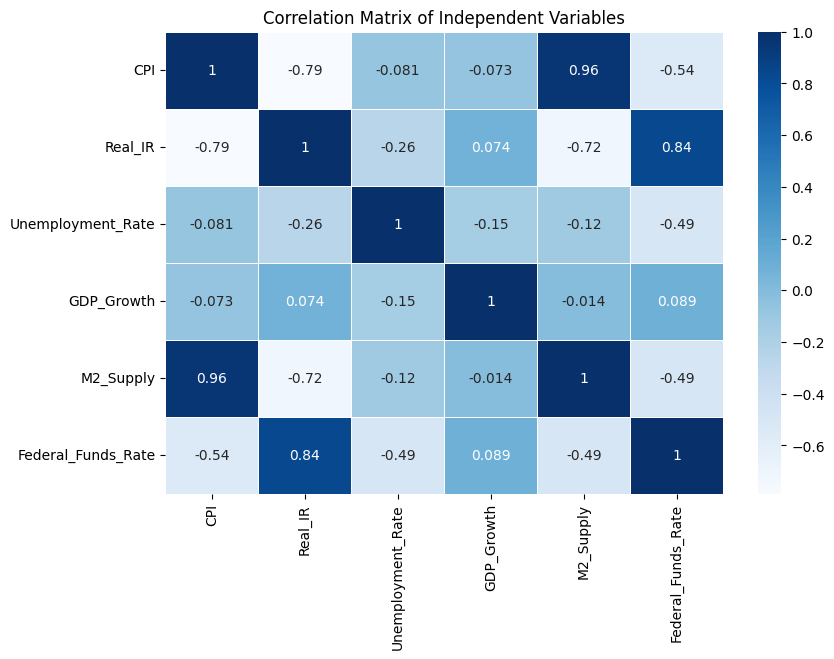

In [19]:
# correlation matrix to define colinearity

corr_matrix = data[['CPI', 'Real_IR', 'Unemployment_Rate', 'GDP_Growth', 'M2_Supply', 'Federal_Funds_Rate']].corr()

plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'Blues', linewidths = 0.5)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

```bash
Based on the correlation matrix and p-value analysis for our reduced model we will be focusing on Unemployment Rate, GDP Growth, and M2 Supply. Even though CPI was statistically significant, it had high colinearity with M2 Supply, and typically it should represent a negative relationship with Dow Jones. Thus, it is being dropped in our reduced model analysis.
```

In [20]:
# Identifying dependent and independent variables for reduced model
independent_variables_reduced = ['Unemployment_Rate', 'GDP_Growth', 'M2_Supply']

x_reduced = data[independent_variables_reduced]
x_constant = sm.add_constant(x_reduced) # Adding a constant value of x

In [21]:
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_constant, y, test_size = .20, shuffle = False)

# Running OLS for reduced model
reduced_model = sm.OLS(y_train_reduced, x_train_reduced).fit()

# printing reduced model summary results
print("==============================================================================")
print("               Reduced Model Train Multiple Linear Regression"                   )
print("==============================================================================")
print(reduced_model.summary())

               Reduced Model Train Multiple Linear Regression
                            OLS Regression Results                            
Dep. Variable:              Dow_Jones   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     458.2
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           1.66e-57
Time:                        19:41:32   Log-Likelihood:                -858.63
No. Observations:                 102   AIC:                             1725.
Df Residuals:                      98   BIC:                             1736.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

```bash
Based on the reduced model, the R-Squared value is .933 which went down a little bit. However, only including statistically significant variables the reduced model of independent variables of Unemployment Rate, GDP Growth and M2 Money Supply explains 93.3% of variation of Dow Jones. 

The coefficients for these variables remained relatively the same. All p-values of this model were statistically significant, except for GDP Growth which is only slightly above 0.05, but we will now run another reduced model by removing this variable.
```

In [22]:
# Identifying dependent and independent variables for reduced model
independent_variables_reduced = ['Unemployment_Rate', 'M2_Supply']

x_reduced = data[independent_variables_reduced]
x_constant = sm.add_constant(x_reduced) # Adding a constant value of x

x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_constant, y, test_size = .20, shuffle = False)

# Running OLS for reduced model
reduced_model = sm.OLS(y_train_reduced, x_train_reduced).fit()

# printing reduced model summary results
print("==============================================================================")
print("               Reduced Model Train Multiple Linear Regression"                   )
print("==============================================================================")
print(reduced_model.summary())

               Reduced Model Train Multiple Linear Regression
                            OLS Regression Results                            
Dep. Variable:              Dow_Jones   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     670.7
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           2.75e-58
Time:                        19:44:44   Log-Likelihood:                -860.28
No. Observations:                 102   AIC:                             1727.
Df Residuals:                      99   BIC:                             1734.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

```bash
After running the reduced model with only significant p-values (Unemployment Rate and M2 Supply), the R-squared adjsusted a little bit to .931 so Unemployment Rate and M2 Supply explains 93.1% of the variation of Dow Jones. 

Unemployment Rate (coefficient = -937.364): This negative relationship makes perfect sense using economic intution, unemployment increases during a recession which in turn is a negative impact on the stock market, decreasing Dow Jones. 

M2 Money Supply (coeffiicent = 1.394): This positive relationship is intuitive, a stronger M2 implies higher liquidity in the US which ultimately leads to a an increase in Dow Jones.
```

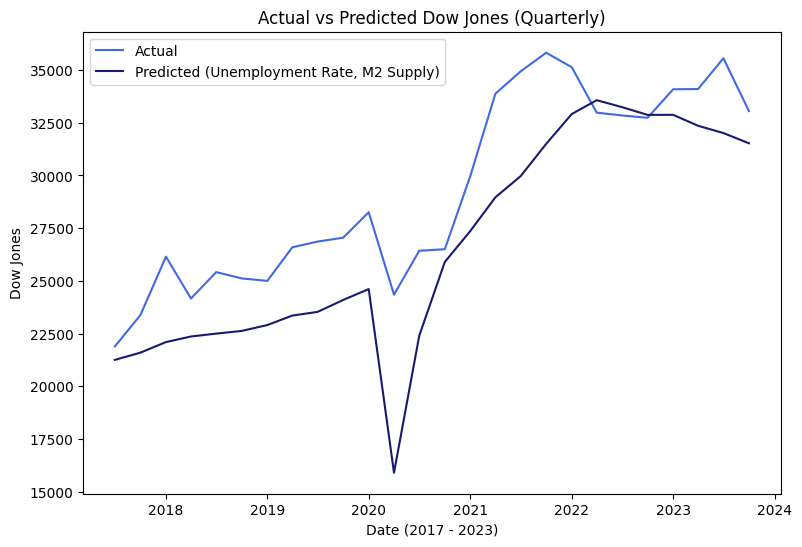

In [24]:
# Plotting our Actual versus our Reduced Model Predicted

y_pred_reduced = reduced_model.predict(x_test_reduced)
mse_reduced = mean_squared_error(y_test_reduced, y_pred_reduced)
rmse_reduced = (mse_reduced) ** 0.5

data['Date'] = pd.to_datetime(data['Date']) # converting date to pandas datetime format
dates = data['Date'].iloc[x_test.index] # gets a datatype of all dates based on index

plt.figure(figsize = (9,6))
plt.plot(dates, y_test_reduced.values, label = 'Actual', color = 'royalblue')
plt.plot(dates, y_pred_reduced.values, label = 'Predicted (Unemployment Rate, M2 Supply)', color = 'midnightblue')
plt.title('Actual vs Predicted Dow Jones (Quarterly)')
plt.xlabel('Date (2017 - 2023)')
plt.ylabel('Dow Jones')
plt.legend()
plt.show()

```bash
This plot explains the actual Dow Jones values relative to our predicted Dow Jones values using the independent variables of Unemployment Rate and M2 Money Supply. In the earlier years prior to 2020 the model captured the general trend of S&P 500 but lacked the actual magnitude. However, during 2020 there was an extreme predicted decrease in Dow Jones probably due to sudden and extreme changes in macroeconomic variables (unemployment rate spiked, M2 Supply shifts due to a decrease in spending). The model sees these extreme variables changes, and predicts a massive collapse in Dow Jones, when in reality there was not this drastic of a collapse in Dow Jones as during 2020 there was government intervention (stimulus checks, interest rate cuts) which allowed the market to stay relatvely stable due to extreme policy support that the macroeconomic variables could not have captured. The model was able to grasp the economic & stock market growth post pandemic, but over-shot it between 2022 and 2023. 
```

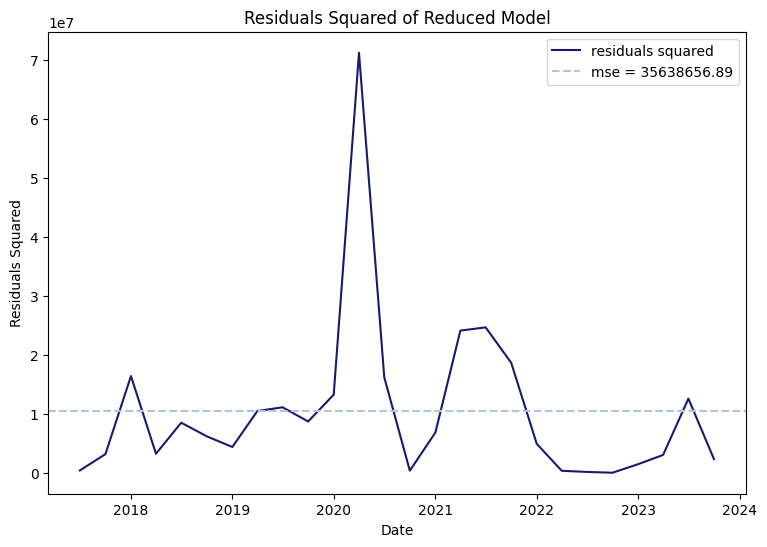

In [27]:
# Residual Squared Plot
y_test_series_reduced =  y_test.squeeze() # convert to series, to calculate residuals

residuals_squared_reduced = (y_test_series_reduced - y_pred_reduced) ** 2

plt.figure(figsize = (9,6))
plt.plot(dates, residuals_squared_reduced, color = 'midnightblue', label = 'residuals squared')
plt.axhline(mse_reduced, color = 'lightsteelblue', label = 'mse = 35638656.89', linestyle = '--')
plt.xlabel('Date')
plt.ylabel('Residuals Squared')
plt.title('Residuals Squared of Reduced Model')
plt.legend()
plt.show()

```bash
From 2017 - 2019 the residuals squared are around the MSE line, either below it or a tad bit above it in 2018 which shows that during these periods Unemployment Rate and M2 Money Supply predict Dow Jones relatively well. 

During 2020 - 2021 there is a massive spike during the 2020 COVID-19 Pandemic. Our model struggled to predict the true severity of the pandemic, due to expected economic variables going down during 2020, but there were other variables that kept Dow Jones relatively strong during a time like this. 

From 2022 - 2023 the residuals squared are relatively above or below the MSE line. The model did a worse job at predicting these values relatively to the earlier years post pandemic especially between 2021 and 2022, but improved from 2022 on.
```